## Desciption


In [1]:
import IsForward_1_0 as parent

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/Combined/LaFleur_supp.csv')

In [3]:
# Displays only the first and last row
df.iloc[[0, -1]]

,File Name,Upstream DNA,Promoter Sequence,Downstream DNA,Observed log(TX/Txref)
0,La Fleur et al (Fig 3a).csv,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,GAATTCGATCAAATTTCGAG,-3.386326
48766,De Novo Designs (Fig 5 b and c).csv,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCTTTGACATATATATAATTTGACAATATAATCACACATTTA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-6.734191


In [4]:
def reverse_complement(seq):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join(complement[base.upper()] for base in reversed(seq))

In [5]:
X = df[['Promoter Sequence']].astype(str).agg(''.join, axis=1)
forward_X, _ = parent.preprocess_sequences(X)
backward_X, _ = parent.preprocess_sequences([reverse_complement(seq) for seq in X.values])

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


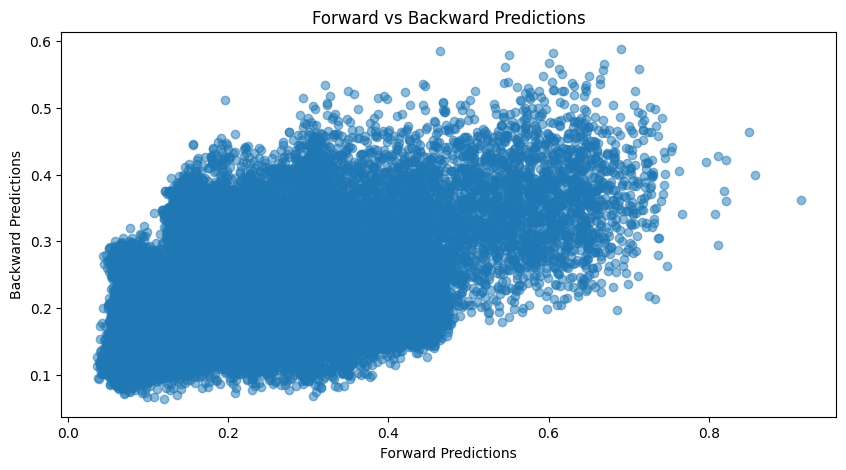

In [6]:
forward_predictions = parent.load_and_predict('CNN_6_1_2', forward_X)
backward_predictions = parent.load_and_predict('CNN_6_1_2', backward_X)

plt.figure(figsize=(10, 5))
plt.scatter(forward_predictions, backward_predictions, alpha=0.5)
plt.xlabel('Forward Predictions')
plt.ylabel('Backward Predictions')
plt.title('Forward vs Backward Predictions')
plt.show()

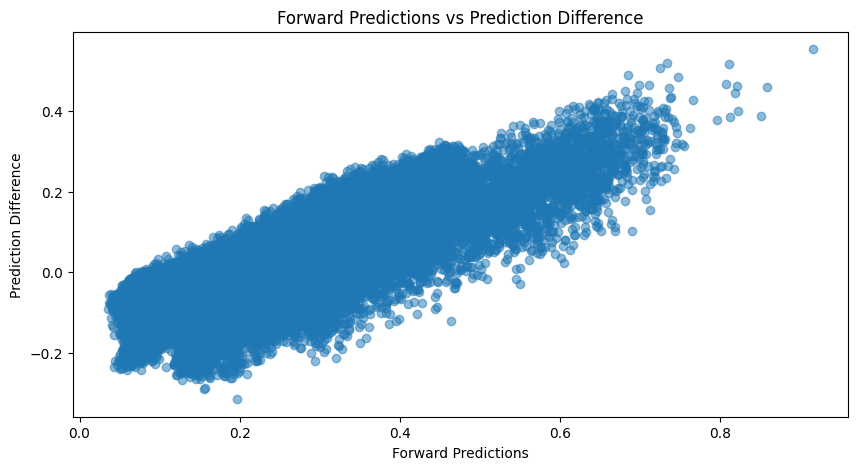

In [7]:
distances = forward_predictions.values.flatten() - backward_predictions.values.flatten()

plt.figure(figsize=(10, 5))
plt.scatter(forward_predictions, distances, alpha=0.5)
plt.xlabel('Forward Predictions')
plt.ylabel('Prediction Difference')
plt.title('Forward Predictions vs Prediction Difference')
plt.show()

In [8]:
# count how many distances are positive
print(f"Number of positive distances: {sum(distances > 0)}")
print(f"Number of negative distances: {sum(distances < 0)}")
print(f"Percent Correct: {sum(distances > 0) / len(distances) * 100:.2f}%")

Number of positive distances: 32794
Number of negative distances: 15973
Percent Correct: 67.25%


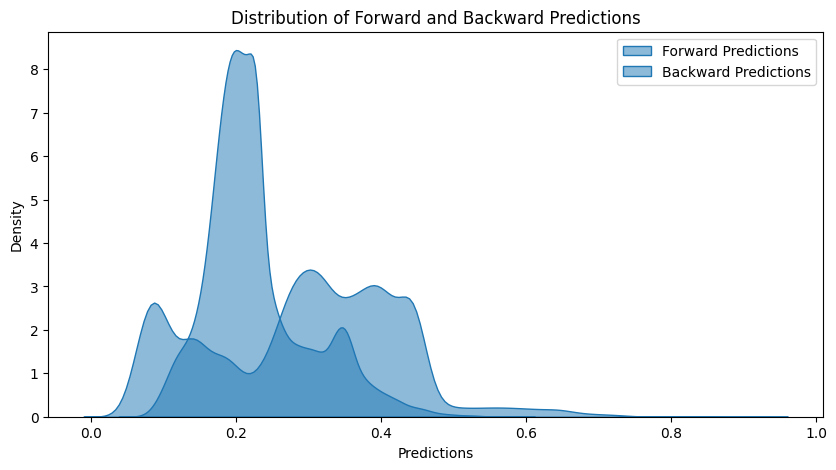

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(forward_predictions, label='Forward Predictions', color='blue', fill=True, alpha=0.5)
sns.kdeplot(backward_predictions, label='Backward Predictions', color='green', fill=True, alpha=0.5)
plt.xlabel('Predictions')
plt.ylabel('Density')
plt.title('Distribution of Forward and Backward Predictions')
plt.legend()
plt.show()